### 혼자 공부하는 머신러닝+딥러닝(01-03, 02-01, 02-02) 자료 활용
data: https://gist.github.com/rickiepark

우리가 머신러닝 엔지니어로 회사에 채용 됐다고 가정하고, 회사 업무를 진행!!!

### 1. 첫 번째 과제(생선 분류)

1. 마켓에서 살아있는 생선을 판매 시작
2. 고객이 온라인으로 주문하면 가장 빠른 물류 센터에서 신선한 생선 곧바로 배송

> 한 가지 문제가 발생
> -물류센터 직원이 생선 구분을 잘 못함

> 따라서, 생선이름을 자동으로 알려주는 머신러닝 모델 요구

- 생선은 "도미". "곤들매기", "농어", "강꼬치고기", "로치", "빙어", "송어"
- 생선분류 문제

> 어떻게 하면 생선을 분류 할 수 있을까?
> 생선의 특징을 알면 구분하기 쉬움(예: 고양이 / 강아지)

In [1]:
# 생선에 특징을 알면 구분하기 쉬움

# 셍선의 길이사 30이상이면 도미!
# 하지만, 특징 1개로는 분류하기가 쉽지 않음
# 특징을 여러개!!!

### 1. 도미 데이터 준비하기

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [3]:
print(type(bream_length))
print(type(bream_weight))

<class 'list'>
<class 'list'>


In [4]:
print(len(bream_length))
print(len(bream_weight))

35
35


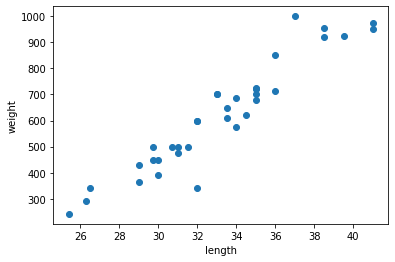

In [5]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 1.2 빙어 데이터 준비하기

In [6]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [7]:
print(len(smelt_length))
print(len(smelt_weight))

14
14


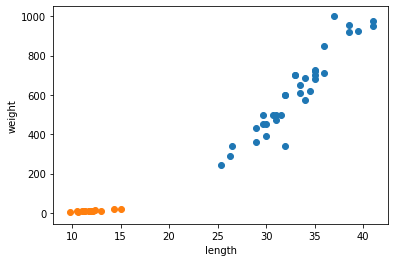

In [8]:
# 파란색: 도미, 주황색: 빙어
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 1.3 데이터 전처리

- 생선분류 모델: 지도학습 => 정답이 반드시 필요

학습에 필요한 데이터
 1. x_train: 특징데이터, 반드시 1쌍
 2. y_train: 정답데이터(도미인지 빙어인지)

In [9]:
# 도미와 빙어 데이터 합치기

# 생선 49마리의 길이와 무게 데이터
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

print(len(length))
print(len(weight))
print(length)
print(weight)

49
49
[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [10]:
# 도미와 빙어 데이터의 길이와 무게 짝 맞추기(1쌍)
# => [길이, 무게]

fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [11]:
# 정답(target) 데이터 만들기
# 빙어: 0, 도미: 1

fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 1.4 K-NN 분류 모델

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 생성

kn = KNeighborsClassifier()

In [13]:
# 모델 학습
kn.fit(fish_data, fish_target)  # x_train, y_train

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
# 모델 평가
# k값 -> default: 5
kn.score(fish_data, fish_target)

1.0

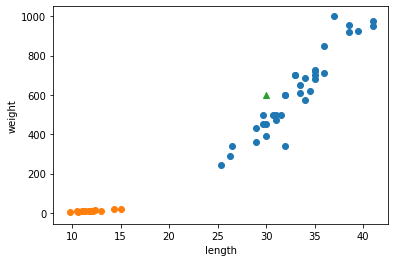

In [15]:
# 실제 데이터 예측
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
# 검증결과: 도미로 예측, 정답 도미
kn.predict([[30, 600]])

array([1])

### 1.6 K-NN 단점
- 새로운 데이터에 대해 예측할 때에는 가장 가까운 직선거리에 어떤 데이터가 있는디 살핌
- 데이터가 많아야지만 정확도가 올라감
- 데이터 크기가 커지면 메모리 많이 필요, 직선거리 계산에도 많은시간 소요

In [17]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [19]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [22]:
kn49 = KNeighborsClassifier(n_neighbors=49)

In [23]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [24]:
print(35/49)

0.7142857142857143
